## Project Overview

### Problem statement

SyriaTel, a telecommunications company, is facing a high churn rate, with many customers discontinuing their services and switching to competitors. By analyzing the dataset, SyriaTel aims to gain insights into factors associated with high customer churn, leading to significant revenue loss

Objectives are:

1. Identify the factors that are most likely to lead to customer churn.

2. Develop a model that can accurately predict which customers are at risk of churning.

3. Take proactive steps to retain customers who are at risk of churning.

My stakeholders are:

1. SyriaTel company

2. Potential Investors

3. Partners of SyriaTel 

By analyzing customer data and identifying key factors contributing to churn, our project offers valuable insights for telecom businesse. These insights can be used to implement targeted strategies to improve customer satisfaction, reduce churn rates, and ultimately increase revenue. 



## Data understanding

We source our data from Kaggle: Churn in Telecom's dataset. These data sources are well-suited for this project because they provide a comprehensive understanding of customer behavior, service usage, and factors that may contribute to churn. 

In [266]:
# Import modules & packages
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

### Loading data

In [267]:
#Importing CSV file as DataFrame
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')

#Displaying first five rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Check for shape

In [268]:
#Display number of rows and columns
print("The number of rows: {}".format(df.shape[0]))

print("The number of columns:{}".format(df.shape[1]))

The number of rows: 3333
The number of columns:21


In [269]:
col_names = df.columns

col_names

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Columns description

state: The state where the customer resides.

phone number: The phone number of the customer.

international plan: Whether the customer has an international plan (Yes or No).

voice mail plan: Whether the customer has a voice mail plan (Yes or No).

area code: The area code associated with the customer's phone number.

account length: The number of days the customer has been an account holder.

number vmail messages: The number of voice mail messages received by the customer.

total day minutes: The total number of minutes the customer used during the day.

total day calls: The total number of calls made by the customer during the day.

total day charge: The total charges incurred by the customer for daytime usage.

total eve minutes: The total number of minutes the customer used during the evening.

total eve calls: The total number of calls made by the customer during the evening.

total eve charge: The total charges incurred by the customer for evening usage.

total night minutes: The total number of minutes the customer used during the night.

total night calls: The total number of calls made by the customer during the night.

total night charge: The total charges incurred by the customer for nighttime usage.

total intl minutes: The total number of international minutes used by the customer.

total intl calls: The total number of international calls made by the customer.

total intl charge: The total charges incurred by the customer for international usage.

customer service calls: The number of customer service calls made by the customer.

churn: Whether the customer has churned (Yes or No)


In [270]:
#Checking column statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [271]:
# Preview all columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Some feature like phone number has less impact on customers churn. We will then term it as irrelevant

In [272]:
#Dropping irrelevant columns
df = df.drop(['phone number'], axis=1)


In [273]:
# Numerical Columns
print(df.select_dtypes(include='number').columns)

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


In [274]:
print(df['area code'].value_counts())

415    1655
510     840
408     838
Name: area code, dtype: int64


However, it's important to note that 'area code', despite being an integer, is functionally a categorical variable. Therefore, we exclude it from our numerical variable list.

In [275]:
# Categorical Columns
print(df.select_dtypes(include='object').columns)

Index(['state', 'international plan', 'voice mail plan'], dtype='object')


In [276]:
#Checking for missing values

df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values

In [277]:
#Checking for duplicate values

df.duplicated().sum()


0

There are no duplicate values

## Explore numerical features

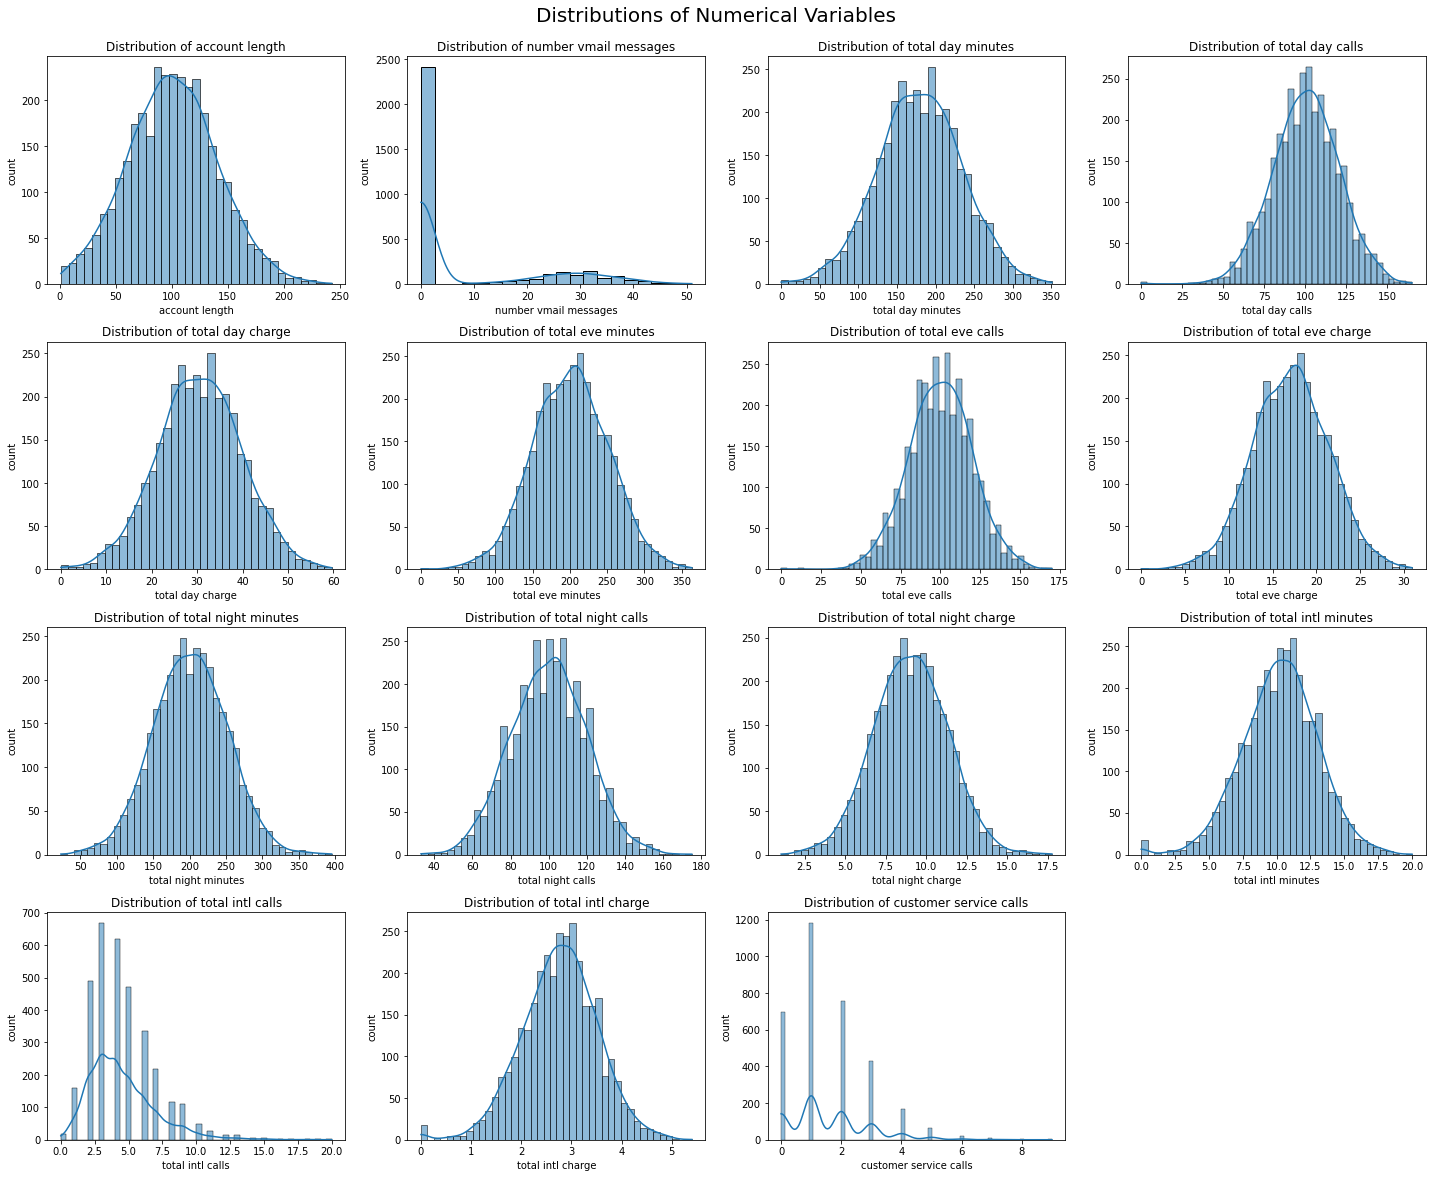

In [278]:
#checking for distribution of the numeric features
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 16))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('count')

# Remove any empty subplots (if fewer than 16 features)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()

# Add an overarching title to the figure
plt.suptitle('Distributions of Numerical Variables', fontsize=20, y=1.02)
plt.show()

For the distribution plots of the features above, all of them except customer service calls and number of voicemail messages have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed.

### Outliers in numerical variables

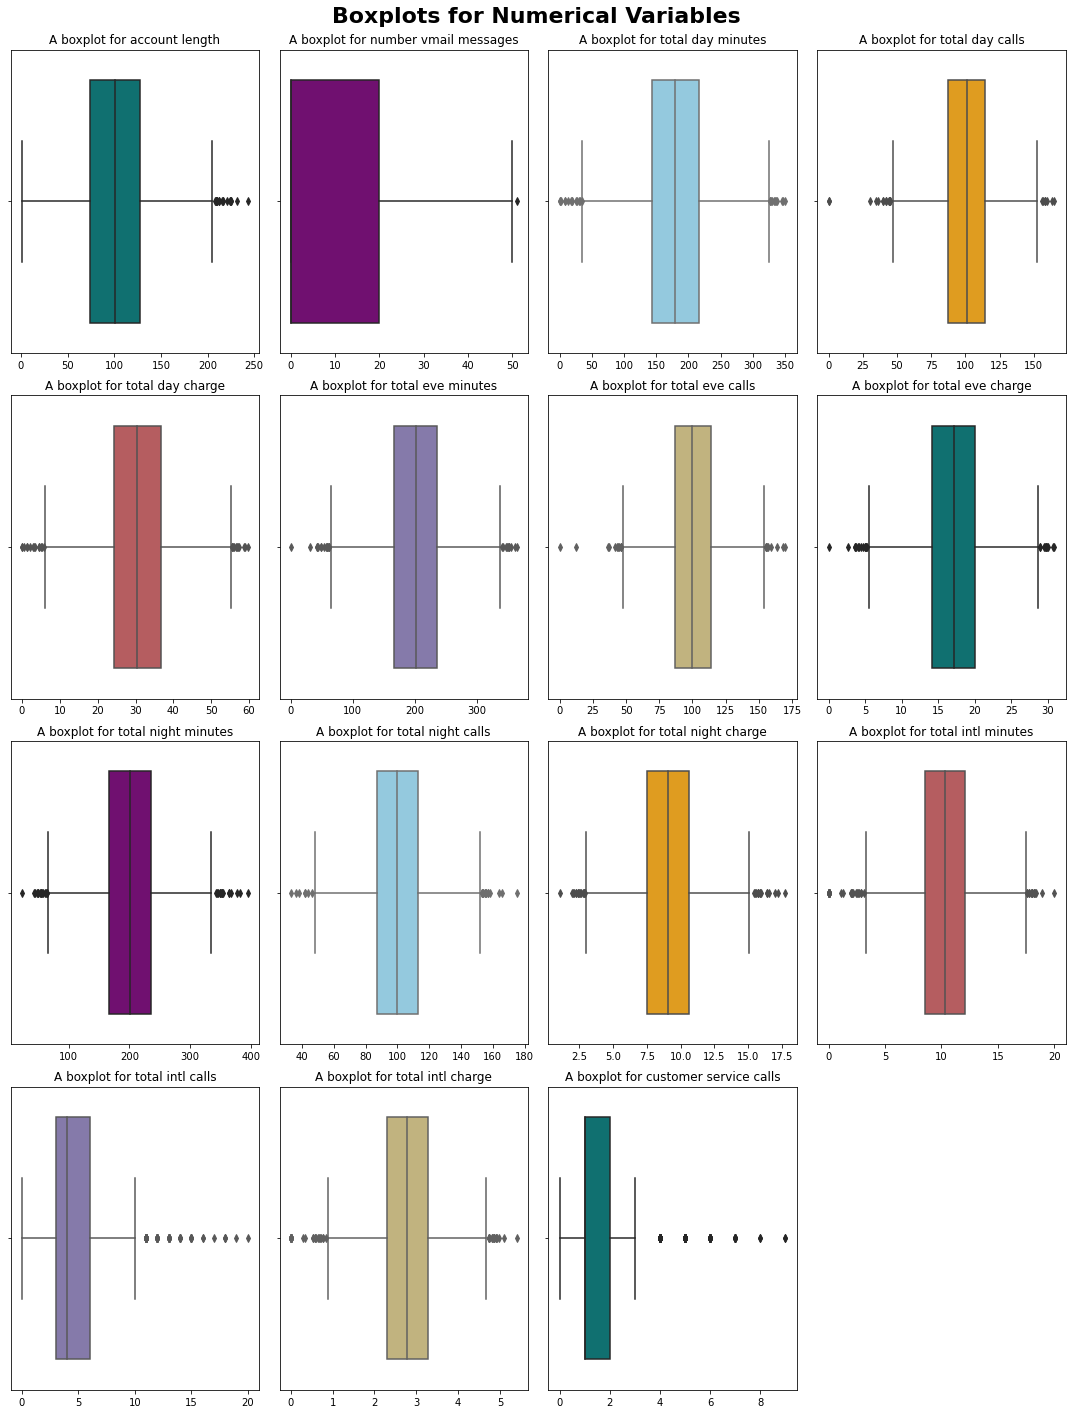

In [279]:
plt.figure(figsize=(15, 20))  # Adjusted figure size to fit better on the screen

boxplot_colors = ["teal","purple", "skyblue", "orange", "#C44E52", "#8172B2", "#CCB974"]

for i, feature in enumerate(numeric_features):
    plt.subplot(4, 4, i + 1)  # Creating a 4x4 grid of subplots
    sns.boxplot(x=df[feature], color=boxplot_colors[i % len(boxplot_colors)])  # Plotting boxplot and cycling through colors
    plt.title(f'A boxplot for {feature}')
    plt.xlabel('')  # Keeping x-axis label empty
    plt.ylabel('')  # Keeping y-axis label empty
    plt.tight_layout()  # Adjusting layout for each subplot

plt.rcParams["figure.dpi"] = 150  # Adjusted DPI for better on-screen fit
plt.suptitle('Boxplots for Numerical Variables\n', fontsize=22, weight='bold')
plt.subplots_adjust(top=0.95)  # Adjusting spacing for title
plt.show()

The above boxplots confirm that there are lot of outliers in these variables.

In [280]:
#Function to remove outliers
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print(df.shape)

(3169, 20)


## Exploratory data analysis

In this section,we explore the relationship or association between two variables in the dataset

What is the relationship between area codes and customer churn

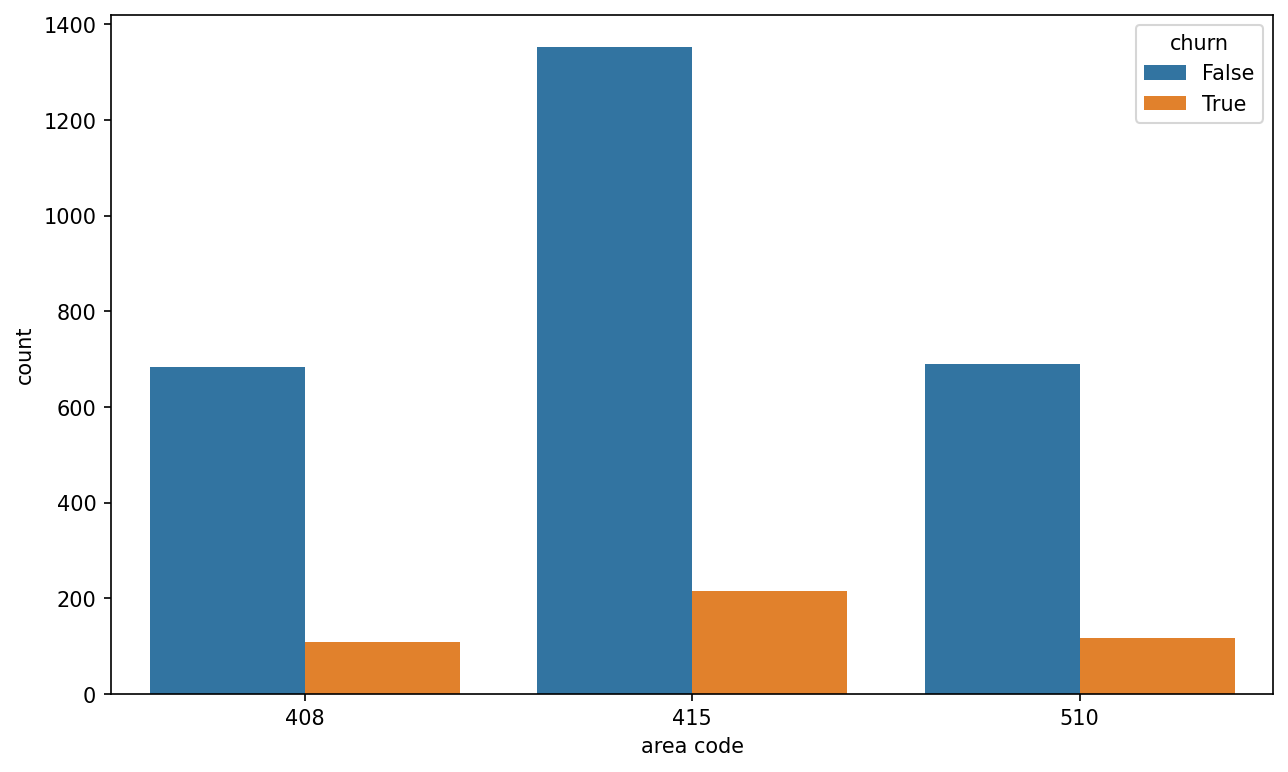

In [281]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='area code', hue='churn');

Area code 415 has a higher customer base and also a higher churn number.

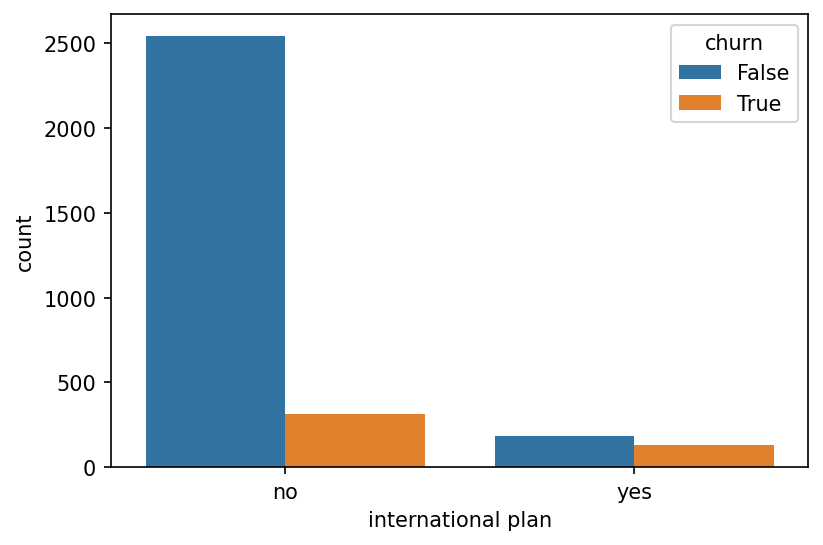

In [282]:
df['international plan'].value_counts()
sns.countplot(data=df, x='international plan', hue='churn');

The majority of customers who churned did not have an international plan.

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

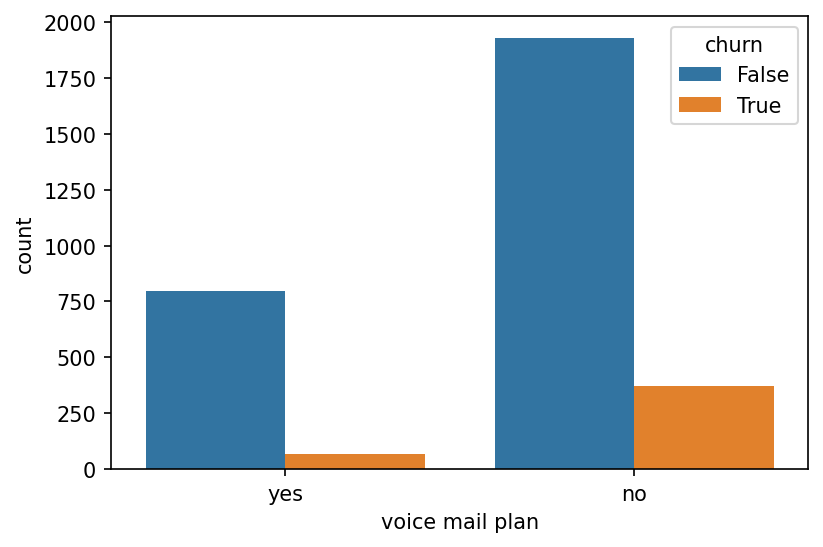

In [283]:
sns.countplot(data = df, x='voice mail plan', hue='churn')

Customers without a voice mail plan have a higher churn rate compared to those with a voice mail plan.

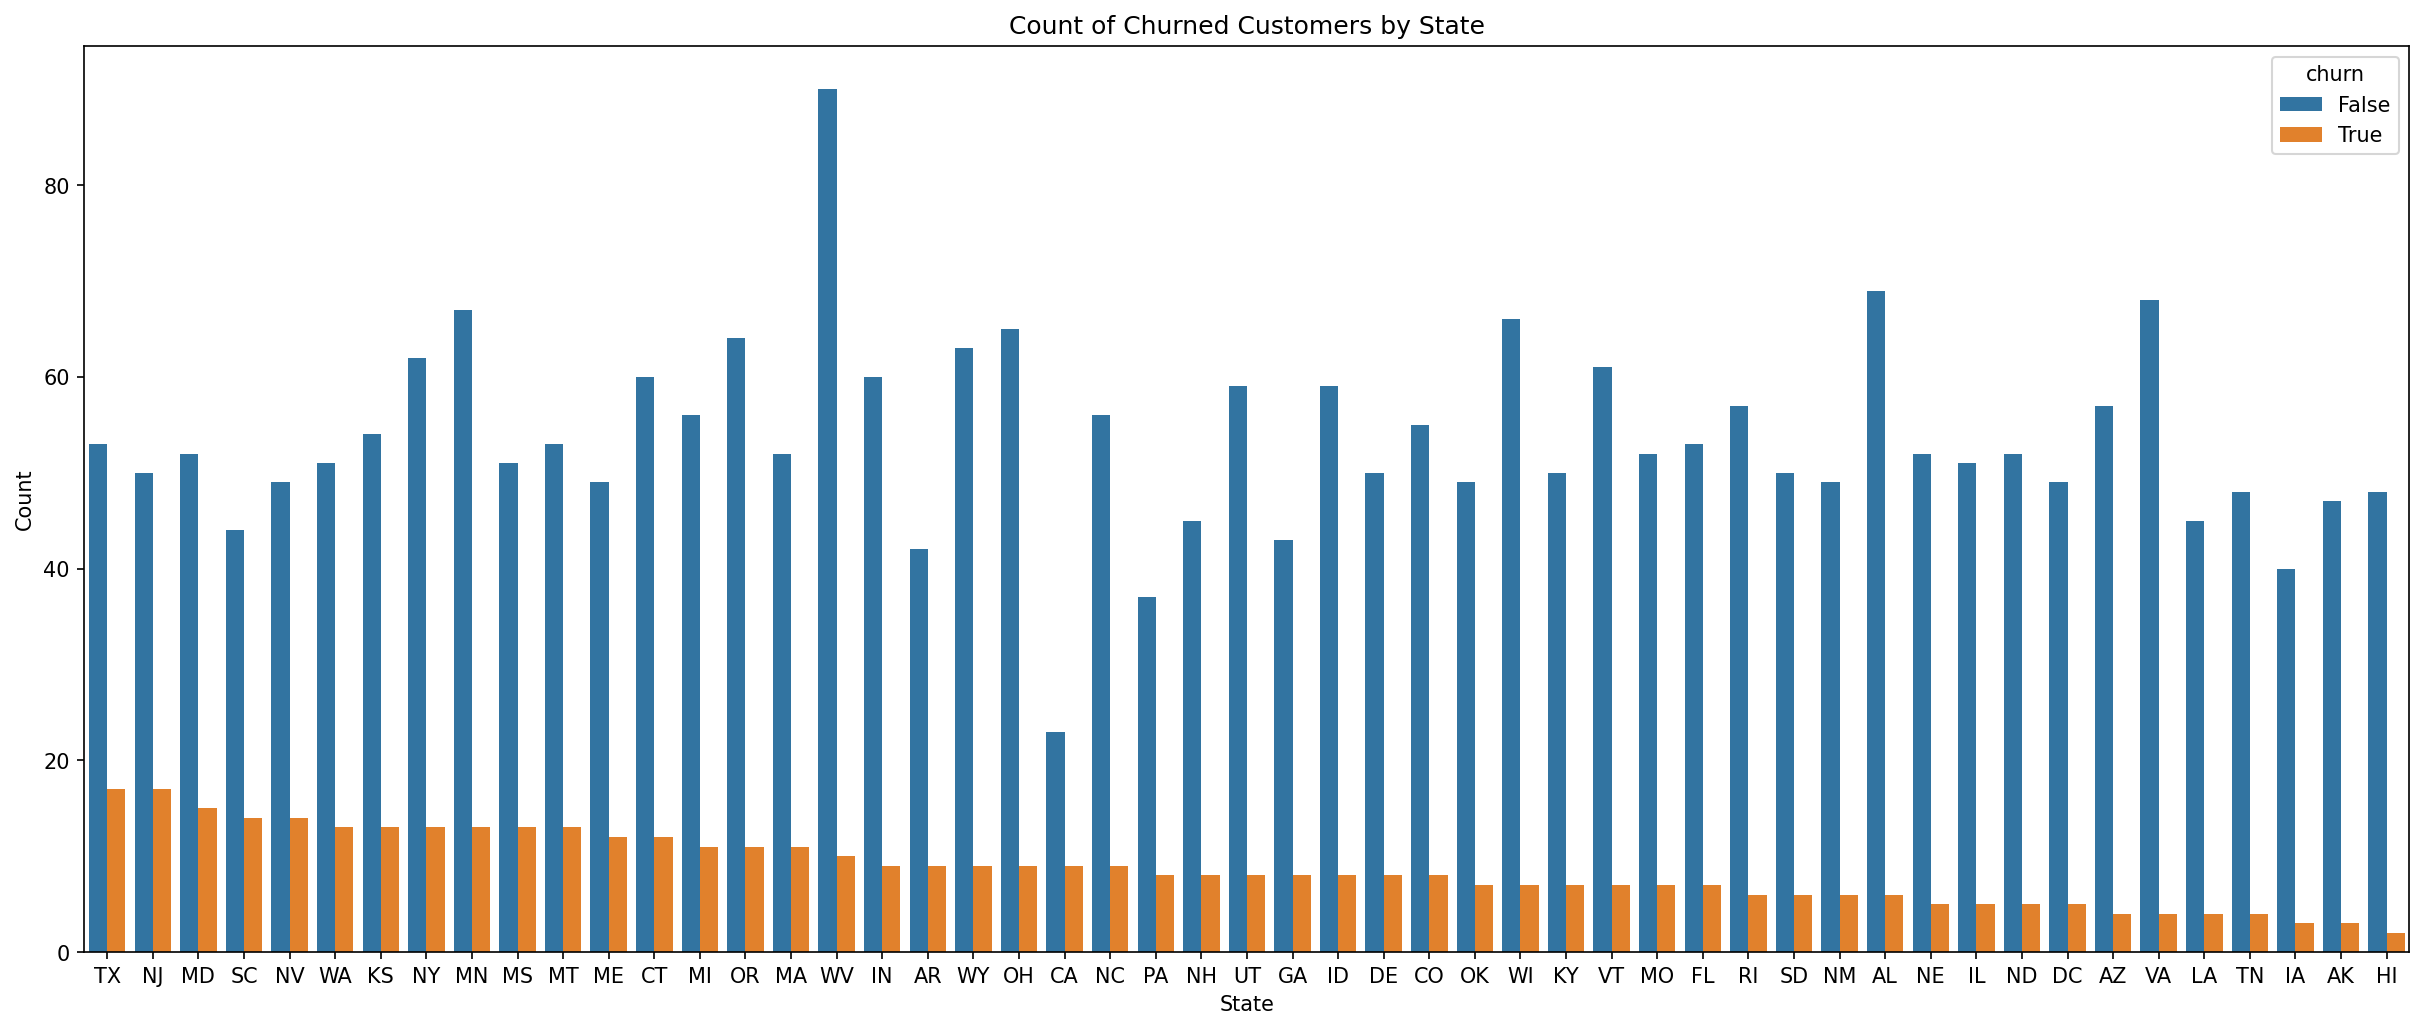

In [284]:
plt.figure(figsize=(20, 8))
state_counts = df[df['churn'] == 1]['state'].value_counts().sort_values(ascending=False)
sns.countplot(data=df, x='state', hue='churn', order=state_counts.index)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Churned Customers by State')
plt.show()

MD, TX, NJ. MI and NY have the highest number of churned customers.

## Data preparation